In [31]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [32]:
path = 'data/Human_protein/'

In [33]:
file = open(path+'data.csv')
next(file)
g = nx.read_edgelist(file, create_using=nx.DiGraph(), delimiter=',', nodetype=int)

In [34]:
g = nx.convert_node_labels_to_integers(G=g, first_label=0)

In [35]:
no_nodes = g.number_of_nodes()
no_edges = g.number_of_edges()
print(no_nodes)
print(no_edges)

2239
6452


/var/folders/7q/_31tpcss3s96l4_6xmb_xhhr0000gp/T/ipykernel_16164/2442137662.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_edges = random.sample(g.edges, 500)


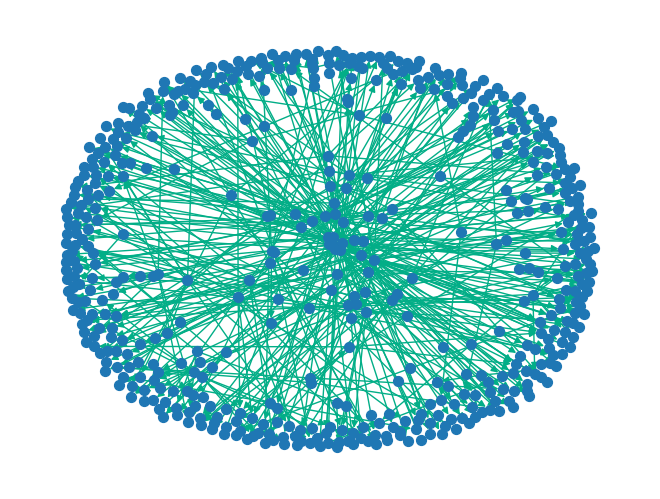

In [36]:
sampled_edges = random.sample(g.edges, 500)
sampled_g = nx.DiGraph()
sampled_g.add_edges_from(sampled_edges)
sampled_g = nx.convert_node_labels_to_integers(G=sampled_g, first_label=0)
subg = nx.spring_layout(sampled_g)
nx.draw(sampled_g, subg, node_color='#1F77B4', edge_color='#02AE87', width=1, edge_cmap='YlGnBu', node_size=50)

In [37]:
import pickle
import random
import time
st = time.time()

edges = dict()
for edge in g.edges:
    edges[(edge[0], edge[1])] = 1
    
missing_edges = set([])
count = 0

while (len(missing_edges)<no_edges):
    if count % 50 == 0:
        print ('iteration: ', count, '\tlen of miss edges: ', len(missing_edges))
    count += 1
    
    a=random.randint(0, no_nodes)
    b=random.randint(0, no_nodes)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            # adding points who less likely to be friends
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                missing_edges.add((a,b))
            else:
                continue  
        except:  
                missing_edges.add((a,b))              
    else:
        continue
        
end = time.time()
print ('\n\ntime taken: ', end-st)

iteration:  0 	len of miss edges:  0
iteration:  50 	len of miss edges:  50
iteration:  100 	len of miss edges:  100
iteration:  150 	len of miss edges:  150
iteration:  200 	len of miss edges:  200
iteration:  250 	len of miss edges:  248
iteration:  300 	len of miss edges:  298
iteration:  350 	len of miss edges:  348
iteration:  400 	len of miss edges:  398
iteration:  450 	len of miss edges:  448
iteration:  500 	len of miss edges:  497
iteration:  550 	len of miss edges:  547
iteration:  600 	len of miss edges:  597
iteration:  650 	len of miss edges:  647
iteration:  700 	len of miss edges:  696
iteration:  750 	len of miss edges:  746
iteration:  800 	len of miss edges:  796
iteration:  850 	len of miss edges:  846
iteration:  900 	len of miss edges:  896
iteration:  950 	len of miss edges:  946
iteration:  1000 	len of miss edges:  996
iteration:  1050 	len of miss edges:  1046
iteration:  1100 	len of miss edges:  1096
iteration:  1150 	len of miss edges:  1146
iteration:  120

In [38]:
len(missing_edges)

6452

In [39]:
pickle.dump(missing_edges,open(path+'missing_edges_final.p','wb'))